In [54]:
# from utils import preprocess, train_test_split_data
from importlib import reload
import os
import utils
from pathlib import Path
import matplotlib.pyplot as plt
from collections import defaultdict
utils = reload(utils)

## Task 1: Data preparation

In [ ]:
# import nltk, nltk.data

# nltk.download('punkt')

# tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
# with open('data/alice_in_wonderland.txt') as f:
#     text = f.read()
#     print('\n-----\n'.join(tokenizer.tokenize(text)))

In [ ]:
# sentencepiece package look for sentence hence linebreak needs to be preserved

with open('data/alice_in_wonderland.txt') as f:
    text = f.read()
    prepro_text = utils.preprocess(text) # preprocessing text
    train, test = utils.train_test_split_data(prepro_text, test_size=0.2) # split the data


In [ ]:
# saving the splitted corpus
with open('eng_text/train_eng.txt', 'w') as f:
    # f.write(str(train))
    f.write('\n'.join(train))

with open('eng_text/test_eng.txt', 'w') as f:
    # f.write(str(test)) 
    f.write('\n'.join(test))

### Comments/ideas
* split is not randomized
* more steps like lemmatization/stemming can be added in prepro
* there is not much preprocessing needs to be done
* may be some special characters/ punctuation can be removed

## Task 2: Subword Segmentation

### 1. Granularity: characters

In [2]:
# training model

## CHANGE PATH TO SHIFT .model & .vocab in models/sentencepiece

# total 72 different types of characters
# coverage changes for non-english

n_ch = 72

!cd models/sentencepiece/ \
  &&spm_train \
  --input='../../eng_text/train_eng.txt' \
  --model_prefix=en_s1_train \
  --vocab_size=$n_ch \
  --character_coverage=1.0 \
  --model_type=bpe
 

sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: ../../eng_text/train_eng.txt
  input_format: 
  model_prefix: en_s1_train
  model_type: BPE
  vocab_size: 72
  self_test_sample_size: 0
  character_coverage: 1
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc
  add_dummy_prefix: 1
  remove_extra_whitespaces: 1
  

In [3]:
# segment the text (original)
!cd models/sentencepiece/ \
  &&spm_encode \
  --model=en_s1_train.model \
  --output_format=piece \
  < '../../eng_text/train_eng.txt' \
  > '../../eng_text/en_s1_train.txt'

In [4]:
# training model - test set

## CHANGE PATH TO SHIFT .model & .vocab in models/sentencepiece

# total 72 different types of characters
# coverage changes for non-english


!cd models/sentencepiece/ \
  &&spm_train \
  --input='../../eng_text/test_eng.txt' \
  --model_prefix=en_s1_test \
  --vocab_size=$n_ch \
  --character_coverage=1.0 \
  --model_type=bpe
 

sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: ../../eng_text/test_eng.txt
  input_format: 
  model_prefix: en_s1_test
  model_type: BPE
  vocab_size: 72
  self_test_sample_size: 0
  character_coverage: 1
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc
  add_dummy_prefix: 1
  remove_extra_whitespaces: 1
  es

In [5]:
# segment the text (original) - test set

!cd models/sentencepiece/ \
  &&spm_encode \
  --model=en_s1_test.model \
  --output_format=piece \
  < '../../eng_text/test_eng.txt' \
  > '../../eng_text/en_s1_test.txt'

### 2. Granularity: subword units (smaller vocabulary)

In [6]:
# training model

# coverage changes for non-english
# fine-tune vocab_size in range of 100-800 for best performance

small_vocab = 450

!cd models/sentencepiece/ \
  &&spm_train \
  --input='../../eng_text/train_eng.txt' \
  --model_prefix=en_s2_train \
  --vocab_size=$small_vocab \
  --character_coverage=1.0 \
  --model_type=bpe
 

sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: ../../eng_text/train_eng.txt
  input_format: 
  model_prefix: en_s2_train
  model_type: BPE
  vocab_size: 450
  self_test_sample_size: 0
  character_coverage: 1
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc
  add_dummy_prefix: 1
  remove_extra_whitespaces: 1
 

In [7]:
# segment the text (original) -train
!cd models/sentencepiece/ \
  &&spm_encode \
  --model=en_s2_train.model \
  --output_format=piece \
  < '../../eng_text/train_eng.txt' \
  > '../../eng_text/en_s2_train.txt'

In [8]:
# training model - test set

# coverage changes for non-english
# fine-tune vocab_size in range of 100-800 for best performance

!cd models/sentencepiece/ \
  &&spm_train \
  --input='../../eng_text/test_eng.txt' \
  --model_prefix=en_s2_test \
  --vocab_size=$small_vocab \
  --character_coverage=1.0 \
  --model_type=bpe
 

sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: ../../eng_text/test_eng.txt
  input_format: 
  model_prefix: en_s2_test
  model_type: BPE
  vocab_size: 450
  self_test_sample_size: 0
  character_coverage: 1
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc
  add_dummy_prefix: 1
  remove_extra_whitespaces: 1
  e

In [9]:
# segment the text (original)
!cd models/sentencepiece/ \
  &&spm_encode \
  --model=en_s2_test.model \
  --output_format=piece \
  < '../../eng_text/test_eng.txt' \
  > '../../eng_text/en_s2_test.txt'

### 3. Granularity: subword units (larger vocabulary)

In [10]:
# training model

# coverage changes for non-english
# fine-tune vocab_size in range of 1500-3000 for best performance
# training model

# coverage changes for non-english
# fine-tune vocab_size in range of 100-800 for best performance

large_vocab = 2000

!cd models/sentencepiece/ \
  &&spm_train \
  --input='../../eng_text/train_eng.txt' \
  --model_prefix=en_s3_train \
  --vocab_size=$large_vocab \
  --character_coverage=1.0 \
  --model_type=bpe
 

sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: ../../eng_text/train_eng.txt
  input_format: 
  model_prefix: en_s3_train
  model_type: BPE
  vocab_size: 2000
  self_test_sample_size: 0
  character_coverage: 1
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc
  add_dummy_prefix: 1
  remove_extra_whitespaces: 1


In [11]:
# segment the text (original)
!cd models/sentencepiece/ \
  &&spm_encode \
  --model=en_s3_train.model \
  --output_format=piece \
  < '../../eng_text/train_eng.txt' \
  > '../../eng_text/en_s3_train.txt'

In [12]:
# training model - test set

# coverage changes for non-english
# fine-tune vocab_size in range of 1500-3000 for best performance
# training model

# coverage changes for non-english
# fine-tune vocab_size in range of 100-800 for best performance

!cd models/sentencepiece/ \
  &&spm_train \
  --input='../../eng_text/test_eng.txt' \
  --model_prefix=en_s3_test \
  --vocab_size=$large_vocab \
  --character_coverage=1.0 \
  --model_type=bpe
 

sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: ../../eng_text/test_eng.txt
  input_format: 
  model_prefix: en_s3_test
  model_type: BPE
  vocab_size: 2000
  self_test_sample_size: 0
  character_coverage: 1
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc
  add_dummy_prefix: 1
  remove_extra_whitespaces: 1
  

In [13]:
# segment the text (original)
!cd models/sentencepiece/ \
  &&spm_encode \
  --model=en_s3_test.model \
  --output_format=piece \
  < '../../eng_text/test_eng.txt' \
  > '../../eng_text/en_s3_test.txt'

## Observation
* Character - Almost every single character is segmented
* Subword unit (smaller vacob) - The length of segmented subword is longer and many words are also considered as subwords
* Subword unit (larger vocab) - Here, subwords are longer. Many words are themself segmented into single subwords. It can also be seen consistently that orignally longer words are broken into two or more segments.  


## Task 3: LM Training

### 1. Baseline (en_s1 - character level)

In [15]:
# Training baseline LM (en_s1)

# At what setting of rnnlm, we need the get the PP of baseline? 
# what is the use of class size

!cd models/rnnlm \
    && ../../rnnlm/rnnlm \
    -train '../../eng_text/en_s1_train.txt' \
    -valid '../../eng_text/en_s1_test.txt' \
    -rnnlm baseline_en_s1 \
      -hidden 40 \
      -rand-seed 1 \
      -debug 2 \
      -bptt 3 \
      -class $n_ch

debug mode: 2
train file: ../../eng_text/en_s1_train.txt
valid file: ../../eng_text/en_s1_test.txt
class size: 72
Hidden layer size: 40
BPTT: 3
Rand seed: 1
rnnlm file: baseline_en_s1
Starting training using file ../../eng_text/en_s1_train.txt
Vocab size: 70
Words in train file: 115760
Iter:   0	Alpha: 0.100000	   TRAIN entropy: 3.1281    Words/sec: 119015.6   VALID entropy: 3.4054
Iter:   1	Alpha: 0.100000	   TRAIN entropy: 2.6953    Words/sec: 116162.9   VALID entropy: 3.3093
Iter:   2	Alpha: 0.100000	   TRAIN entropy: 2.5930    Words/sec: 108518.5   VALID entropy: 3.3068
Iter:   3	Alpha: 0.050000	   TRAIN entropy: 2.4821    Words/sec: 99745.0   VALID entropy: 3.2160
Iter:   4	Alpha: 0.025000	   TRAIN entropy: 2.4283    Words/sec: 110235.0   VALID entropy: 3.1463
Iter:   5	Alpha: 0.012500	   TRAIN entropy: 2.4027    Words/sec: 116410.6   VALID entropy: 3.0978
Iter:   6	Alpha: 0.006250	   TRAIN entropy: 2.3894    Words/sec: 118344.7   VALID entropy: 3.0674
Iter:   7	Alpha: 0.003125	  

### 2. Baseline (smaller vocab - en_s2)
 

In [16]:
!cd models/rnnlm/ \
    && ../../rnnlm/rnnlm \
    -train '../../eng_text/en_s2_train.txt' \
    -valid '../../eng_text/en_s2_test.txt' \
    -rnnlm baseline_en_s2 \
      -hidden 40 \
      -rand-seed 1 \
      -debug 2 \
      -bptt 3 \
      -class $small_vocab

debug mode: 2
train file: ../../eng_text/en_s2_train.txt
valid file: ../../eng_text/en_s2_test.txt
class size: 450
Hidden layer size: 40
BPTT: 3
Rand seed: 1
rnnlm file: baseline_en_s2
Starting training using file ../../eng_text/en_s2_train.txt
Vocab size: 442
Words in train file: 46742
Iter:   0	Alpha: 0.100000	   TRAIN entropy: 7.5093    Words/sec: 31961.6   VALID entropy: 7.1103
Iter:   1	Alpha: 0.100000	   TRAIN entropy: 6.6438    Words/sec: 30707.2   VALID entropy: 6.5573
Iter:   2	Alpha: 0.100000	   TRAIN entropy: 5.9915    Words/sec: 31639.9   VALID entropy: 6.3010
Iter:   3	Alpha: 0.100000	   TRAIN entropy: 5.5659    Words/sec: 31982.9   VALID entropy: 6.1937
Iter:   4	Alpha: 0.100000	   TRAIN entropy: 5.2843    Words/sec: 31796.5   VALID entropy: 6.1650
Iter:   5	Alpha: 0.100000	   TRAIN entropy: 5.0921    Words/sec: 30927.1   VALID entropy: 6.1694
Iter:   6	Alpha: 0.050000	   TRAIN entropy: 5.0307    Words/sec: 29972.6   VALID entropy: 6.0552
Iter:   7	Alpha: 0.025000	   TRAI

### 3. Baseline (larger vocab - en_s3)

In [17]:
!cd models/rnnlm/ \
    && ../../rnnlm/rnnlm \
    -train '../../eng_text/en_s3_train.txt' \
    -valid '../../eng_text/en_s3_test.txt' \
    -rnnlm baseline_en_s3 \
      -hidden 40 \
      -rand-seed 1 \
      -debug 2 \
      -bptt 3 \
      -class $large_vocab

debug mode: 2
train file: ../../eng_text/en_s3_train.txt
valid file: ../../eng_text/en_s3_test.txt
class size: 2000
Hidden layer size: 40
BPTT: 3
Rand seed: 1
rnnlm file: baseline_en_s3
Starting training using file ../../eng_text/en_s3_train.txt
Vocab size: 1829
Words in train file: 32645
Iter:   0	Alpha: 0.100000	   TRAIN entropy: 8.2916    Words/sec: 6794.7   VALID entropy: 7.1652
Iter:   1	Alpha: 0.100000	   TRAIN entropy: 7.5869    Words/sec: 7154.0   VALID entropy: 6.7712
Iter:   2	Alpha: 0.100000	   TRAIN entropy: 7.1646    Words/sec: 7270.9   VALID entropy: 6.6217
Iter:   3	Alpha: 0.100000	   TRAIN entropy: 6.8658    Words/sec: 7305.7   VALID entropy: 6.4476
Iter:   4	Alpha: 0.100000	   TRAIN entropy: 6.6328    Words/sec: 7231.6   VALID entropy: 6.3239
Iter:   5	Alpha: 0.100000	   TRAIN entropy: 6.4401    Words/sec: 7245.1   VALID entropy: 6.2968
Iter:   6	Alpha: 0.100000	   TRAIN entropy: 6.2748    Words/sec: 7233.1   VALID entropy: 6.2871
Iter:   7	Alpha: 0.050000	   TRAIN ent

### 1. Custom hparam training (character level)

In [18]:
# Training baseline LM (en_s1)

# At what setting of rnnlm, we need the get the PP of baseline? 
# what is the use of class size

!cd models/rnnlm \
    && ../../rnnlm/rnnlm \
    -train '../../eng_text/en_s1_train.txt' \
    -valid '../../eng_text/en_s1_test.txt' \
    -rnnlm en_s1 \
      -hidden 70 \
      -rand-seed 1 \
      -debug 2 \
      -bptt 5 \
      -class $n_ch

debug mode: 2
train file: ../../eng_text/en_s1_train.txt
valid file: ../../eng_text/en_s1_test.txt
class size: 72
Hidden layer size: 70
BPTT: 5
Rand seed: 1
rnnlm file: en_s1
Starting training using file ../../eng_text/en_s1_train.txt
Vocab size: 70
Words in train file: 115760
Iter:   0	Alpha: 0.100000	   TRAIN entropy: 3.1144    Words/sec: 50840.6   VALID entropy: 3.3655
Iter:   1	Alpha: 0.100000	   TRAIN entropy: 2.6143    Words/sec: 50518.0   VALID entropy: 3.2469
Iter:   2	Alpha: 0.100000	   TRAIN entropy: 2.4622    Words/sec: 50714.8   VALID entropy: 3.2018
Iter:   3	Alpha: 0.100000	   TRAIN entropy: 2.3755    Words/sec: 50507.6   VALID entropy: 3.1991
Iter:   4	Alpha: 0.050000	   TRAIN entropy: 2.2564    Words/sec: 50367.4   VALID entropy: 3.0576
Iter:   5	Alpha: 0.025000	   TRAIN entropy: 2.1936    Words/sec: 50507.4   VALID entropy: 2.9791
Iter:   6	Alpha: 0.012500	   TRAIN entropy: 2.1612    Words/sec: 50093.7   VALID entropy: 2.9323
Iter:   7	Alpha: 0.006250	   TRAIN entropy:

### 2. Custom hparam training (smaller vocab - en_s2)

In [21]:
# Training LM on subword units (smaller vocab - en_s2)

#incr hidden -> better pp
#incr bptt -> better pp
# if class < vocabsize -> worse pp
#incr class -> better pp

## May be need to simplify the corpus (in preprocessing)

      # -bptt-block 1 \
!cd models/rnnlm/ \
    && ../../rnnlm/rnnlm \
    -train '../../eng_text/en_s2_train.txt' \
    -valid '../../eng_text/en_s2_test.txt' \
    -rnnlm en_s2 \
      -hidden 100 \
      -rand-seed 1 \
      -debug 2 \
      -bptt 6 \
      -class $small_vocab

debug mode: 2
train file: ../../eng_text/en_s2_train.txt
valid file: ../../eng_text/en_s2_test.txt
class size: 450
Hidden layer size: 100
BPTT: 6
Rand seed: 1
rnnlm file: en_s2
Starting training using file ../../eng_text/en_s2_train.txt
Vocab size: 442
Words in train file: 46742
Iter:   0	Alpha: 0.100000	   TRAIN entropy: 7.5122    Words/sec: 10417.7   VALID entropy: 7.1310
Iter:   1	Alpha: 0.100000	   TRAIN entropy: 6.6173    Words/sec: 9906.2   VALID entropy: 6.5883
Iter:   2	Alpha: 0.100000	   TRAIN entropy: 5.9341    Words/sec: 10865.0   VALID entropy: 6.3313
Iter:   3	Alpha: 0.100000	   TRAIN entropy: 5.4813    Words/sec: 9939.4   VALID entropy: 6.2205
Iter:   4	Alpha: 0.100000	   TRAIN entropy: 5.1746    Words/sec: 10886.0   VALID entropy: 6.1830
Iter:   5	Alpha: 0.100000	   TRAIN entropy: 4.9538    Words/sec: 10795.1   VALID entropy: 6.1716
Iter:   6	Alpha: 0.050000	   TRAIN entropy: 4.6940    Words/sec: 10727.7   VALID entropy: 6.0343
Iter:   7	Alpha: 0.025000	   TRAIN entropy:

### 3. Custom hparam training (larger vocab - en_s3)

In [29]:
# Training LM on subword units (larger vocab - en_s3)

# At what setting of rnnlm, we need the get the PP of baseline? 
# what is the use of class size
# How to increase no. of iterations?

#incr hidden -> better pp
#incr bptt -> worse pp
# if class < vocabsize -> worse pp
#incr class -> better pp

## May be need to simplify the corpus (in preprocessing)

      # -bptt-block 1 \
!cd models/rnnlm/ \
    && ../../rnnlm/rnnlm \
    -train '../../eng_text/en_s3_train.txt' \
    -valid '../../eng_text/en_s3_test.txt' \
    -rnnlm en_s3 \
      -hidden 140 \
      -rand-seed 1 \
      -debug 2 \
      -bptt 3 \
      -class $large_vocab

debug mode: 2
train file: ../../eng_text/en_s3_train.txt
valid file: ../../eng_text/en_s3_test.txt
class size: 2000
Hidden layer size: 140
BPTT: 3
Rand seed: 1
rnnlm file: en_s3
Starting training using file ../../eng_text/en_s3_train.txt
Vocab size: 1829
Words in train file: 32645
Iter:   0	Alpha: 0.100000	   TRAIN entropy: 8.3227    Words/sec: 1499.2   VALID entropy: 7.2129
Iter:   1	Alpha: 0.100000	   TRAIN entropy: 7.6075    Words/sec: 1702.4   VALID entropy: 6.7901
Iter:   2	Alpha: 0.100000	   TRAIN entropy: 7.1662    Words/sec: 1733.0   VALID entropy: 6.5541
Iter:   3	Alpha: 0.100000	   TRAIN entropy: 6.8485    Words/sec: 1706.6   VALID entropy: 6.4327
Iter:   4	Alpha: 0.100000	   TRAIN entropy: 6.5985    Words/sec: 1708.7   VALID entropy: 6.3583
Iter:   5	Alpha: 0.100000	   TRAIN entropy: 6.3841    Words/sec: 1730.4   VALID entropy: 6.3208
Iter:   6	Alpha: 0.100000	   TRAIN entropy: 6.1901    Words/sec: 1737.4   VALID entropy: 6.3402
Iter:   7	Alpha: 0.050000	   TRAIN entropy: 6.

## Task 4: Text Generation

In [30]:
## 1. Character level granularity

!cd models/rnnlm/ \
    && for i in 10 100 1000 10000 100000 1000000 10000000; do \
            ../../rnnlm/rnnlm \
            -rnnlm  en_s1\
            -gen $i \
            -debug 0 \
            >> "../../eng_text/gen_en_s1/${i}.txt"; \
       done

In [31]:
## 2. subword units (smaller vocab - en_s2)

!cd models/rnnlm \
    && for i in 10 100 1000 10000 100000 1000000 10000000; do \
            ../../rnnlm/rnnlm \
            -rnnlm en_s2 \
            -gen $i \
            -debug 0 \
            >> "../../eng_text/gen_en_s2/${i}.txt"; \
       done

In [32]:
## 3. subword units (larger vocab - en_s3)

!cd models/rnnlm \
    && for i in 10 100 1000 10000 100000 1000000 10000000; do \
            ../../rnnlm/rnnlm \
            -rnnlm en_s3 \
            -gen $i \
            -debug 0 \
            >> "../../eng_text/gen_en_s3/${i}.txt"; \
       done

In [33]:
# back to original (human readable form) from subword units 

!cd models/sentencepiece/ \
  &&spm_decode \
  --model=en_s1_train.model \
  --input_format=piece \
  < "../../eng_text/gen_en_s1/100.txt" \
  > "../../eng_text/gen_en_s1/decod_100.txt"

In [34]:
# back to original (human readable form) from subword units 

!cd models/sentencepiece/ \
  &&spm_decode \
  --model=en_s2_train.model \
  --input_format=piece \
  < "../../eng_text/gen_en_s2/100.txt" \
  > "../../eng_text/gen_en_s2/decod_100.txt"

In [35]:
# back to original (human readable form) from subword units 

!cd models/sentencepiece/ \
  &&spm_decode \
  --model=en_s3_train.model \
  --input_format=piece \
  < "../../eng_text/gen_en_s3/100.txt" \
  > "../../eng_text/gen_en_s3/decod_100.txt"

### From inspection of generated text:
* With character level granularity, there is a structure of sentence and many generated words are also real. However, the grammar is very bad and some words doesn't exist in english.
* With small subword granularity, there are more real words. There is style of quotes to indicate they are dialogues. It still lacks grammar and most sentences doesn't make sense or a complete meaning.
* With larger subword vocabulary, more words are real. We can see more dialogues which even indicate they are said by Alice. Overall, more information or richer meaning is delivered here.

The quality of generated text improves as we increase the vocabulary size.

In [67]:
# decoding all the generated text files

!cd models/sentencepiece/ \
    && for i in 10 100 1000 10000 100000 1000000 10000000; do \
        spm_decode \
        --model=en_s1_train.model \
        --input_format=piece \
        < "../../eng_text/gen_en_s1/${i}.txt" \
        > "../../eng_text/gen_en_s1/decod.${i}.txt"; \
       done


In [68]:
!cd models/sentencepiece/ \
    && for i in 10 100 1000 10000 100000 1000000 10000000; do \
        spm_decode \
        --model=en_s2_train.model \
        --input_format=piece \
        < "../../eng_text/gen_en_s2/${i}.txt" \
        > "../../eng_text/gen_en_s2/decod.${i}.txt"; \
       done


In [69]:
!cd models/sentencepiece/ \
    && for i in 10 100 1000 10000 100000 1000000 10000000; do \
        spm_decode \
        --model=en_s3_train.model \
        --input_format=piece \
        < "../../eng_text/gen_en_s3/${i}.txt" \
        > "../../eng_text/gen_en_s3/decod.${i}.txt"; \
       done


## Task 5 OOV comparison

In [81]:
# extracting vocabulary
train_vocabs = utils.vocab_generator(Path('eng_text/train_eng.txt').open('r').read())
test_vocabs = utils.vocab_generator(Path('eng_text/test_eng.txt').open('r').read())


In [73]:
# characters
extra_vocab_ch = {}
for path in Path('eng_text/gen_en_s1/').rglob('decod*.txt'):
    k = int(path.name.split(".")[1])
    extra_vocab_ch[k] = utils.vocab_generator(Path(path).open('r').read())

In [79]:
# smaller vocab
extra_vocab_smV = {}
for path in Path('eng_text/gen_en_s2/').rglob('decod*.txt'):
    k = int(path.name.split(".")[1])
    extra_vocab_smV[k] = utils.vocab_generator(Path(path).open('r').read())

In [80]:
# larger vocab
extra_vocab_lrV = {}
for path in Path('eng_text/gen_en_s3/').rglob('decod*.txt'):
    k = int(path.name.split(".")[1])
    extra_vocab_lrV[k] = utils.vocab_generator(Path(path).open('r').read())

### 5.1 Calc OOV rate (with all generated text at each granularity)

In [93]:
# character level
oov_rate = utils.oov_calculator(
    # including all generated text vocab too
    train_vocabs + list(set([w for v in extra_vocab_ch.values() for w in v])), 
    test_vocabs
)

print("OOV rate (character granularity):", oov_rate)

OOV rate (character granularity): 0.2258326563769293


In [94]:
# smaller vocabulary subword granularity
oov_rate = utils.oov_calculator(
    # including all generated text vocab too
    train_vocabs + list(set([w for v in extra_vocab_smV.values() for w in v])), 
    test_vocabs
)
print("OOV rate (smaller vocab granularity):", oov_rate)

OOV rate (smaller vocab granularity): 0.21121039805036557


In [95]:
# larger vocabulary subword granularity
oov_rate = utils.oov_calculator(
    # including all generated text vocab too
    train_vocabs + list(set([w for v in extra_vocab_lrV.values() for w in v])), 
    test_vocabs
)
print("OOV rate (larger vocab granularity):", oov_rate)

OOV rate (larger vocab granularity): 0.23639317627944761


### 5.2 OOV rate cal (k times)

In [96]:
# character
oov_ch = []
for k in range(1,8):
    oov_rate = utils.oov_calculator(
        train_vocabs + extra_vocab_ch[10**k],
        test_vocabs 
        )
    oov_ch.append(oov_rate)

print(oov_ch)

[0.32087733549959385, 0.32087733549959385, 0.32087733549959385, 0.3200649878147847, 0.314378554021121, 0.27538586515028435, 0.2258326563769293]


In [97]:
# smaller vocabulary
oov_smV = []
for k in range(1,8):
    oov_rate = utils.oov_calculator(
        train_vocabs + extra_vocab_smV[10**k],
        test_vocabs 
        )
    oov_smV.append(oov_rate)

print(oov_smV)

[0.32087733549959385, 0.32087733549959385, 0.3200649878147847, 0.31681559707554835, 0.2956945572705118, 0.2502030869212023, 0.21121039805036557]


In [98]:
# larger vocabulary
oov_lrV = []
for k in range(1,8):
    oov_rate = utils.oov_calculator(
        train_vocabs + extra_vocab_lrV[10**k],
        test_vocabs 
        )
    oov_lrV.append(oov_rate)

print(oov_lrV)

[0.32087733549959385, 0.32087733549959385, 0.3200649878147847, 0.31681559707554835, 0.30869212022745735, 0.28107229894394803, 0.23639317627944761]


### 5.3 Plots

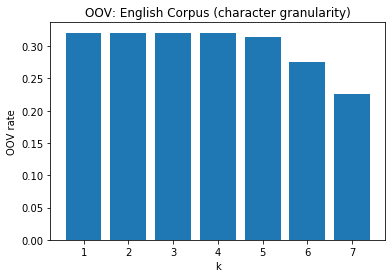

In [99]:
# character 
x = range(1,8)

plt.bar(x, oov_ch)
plt.xlabel('k')
plt.ylabel('OOV rate')
plt.title("OOV: English Corpus (character granularity)" )
plt.show()


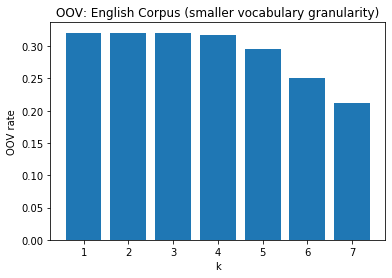

In [100]:
# smaller vocabulary 
x = range(1,8)

plt.bar(x, oov_smV)
plt.xlabel('k')
plt.ylabel('OOV rate')
plt.title("OOV: English Corpus (smaller vocabulary granularity)" )
plt.show()


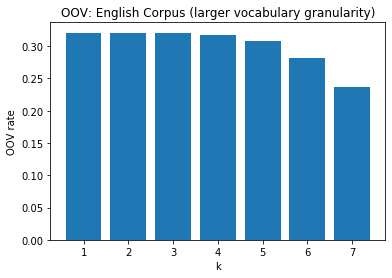

In [102]:
# larger vocabulary 
x = range(1,8)

plt.bar(x, oov_lrV)
plt.xlabel('k')
plt.ylabel('OOV rate')
plt.title("OOV: English Corpus (larger vocabulary granularity)" )
plt.show()


### Observations
For all level of granularity the oov rate decreases as size of generated corpus (10^k) increases. In a practicle application, I would prefer, a model with smaller subword vocabulary. From our experiment, it gets the lowest OOV rate. Also intuitively, character level granularity doesn't make meaningful words and model long term dependencies.The larger vocabulary subwords becomes very close to actual words. The smaller vocabulary subwords fits better to close the generative gap between characters and whole words.